# 10.1 Triangle Distribution


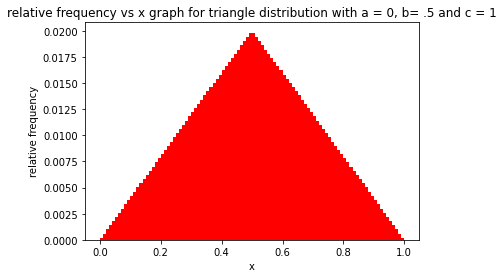

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline  

# Take in values a, , c and A list of uniform istribution U to generate 
#a triangle distribution using inverse tranform
def inv2triangle(a,b,c,U):
    
    k = 2/(c - a)
    x = []
    for u in U:
        if u <= 0:
            x.append(a)
        elif u <= k*(b - a)/2 :
            x.append(math.sqrt(2*(b-a)*u/k) + a)
        elif u <= k*(c - a)/2 : 
            x.append(c - math.sqrt((c-a)*(c-b) - (2*u*(c-b)/k)) )
        else :
            x.append(c)
    return x

#Linear Congruantioal Multiplier to generate unform pseudo random numbers
def LCM(a, xi, c, m):
    if (m < 0 or a <= 0 or a >= m or xi < 0 or xi >= m):
        return None
    return (a*xi + c)%m

#Uses LCM to generate a list of random numbers till a cycle is form or limit is reached
def CalcCycle(a, x0, c,m, limit):
    RndNum = []
    RndNum.append(x0)

    x = LCM(a, x0, c, m)
    lmt = 0
    prime = 0

    while(x not in RndNum and x != None and lmt < limit):
        RndNum.append(x/m)
        x = LCM(a, x, c, m)
        lmt += 1
        #print(x)


    return RndNum

# Generate Uniform random numbers
limit = 10000000
a = 5
c = 3
m = 2**16
x0 = 1

rndNum = CalcCycle(a, x0, c, m, limit)
rnp = np.array(rndNum)


#Compute triangle distribution

x = inv2triangle(0,.5,1,rndNum)
xnp = np.array(x)

# Ploting Data for triangle
n,b,p = plt.hist(xnp,weights=np.zeros_like(xnp)+1./ xnp.size, bins= 100, color='r')
plt.xlabel('x')
plt.ylabel('relative frequency')
plt.title('relative frequency vs x graph for triangle distribution with a = 0, b= .5 and c = 1')
plt.show()

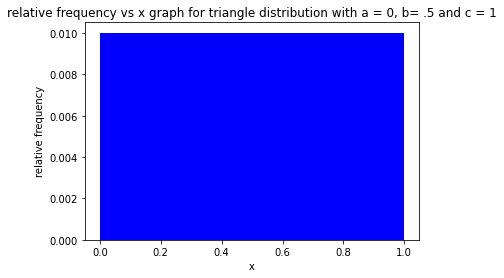

In [3]:
# Ploting Data for uniform distribution
n,b,p = plt.hist(rnp,weights=np.zeros_like(xnp)+1./ xnp.size, bins= 100, color='b')
plt.xlabel('x')
plt.ylabel('relative frequency')
plt.title('relative frequency vs x graph for triangle distribution with a = 0, b= .5 and c = 1')
plt.show()

# 10.2 Piece wise linear  visualisation 

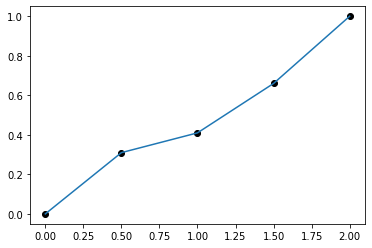

In [4]:
from matplotlib import pyplot as plt

data = [[0,0],[.5,.31],[1,.41],[1.5,.66],[2,1]]
x = []
y = []
for d in data:
    x.append(d[0])
    y.append(d[1])
plt.plot(x, y)
plt.scatter(x,y, color="black")
plt.show()

# 10.2 Algorithm implimentation for generating random deviates

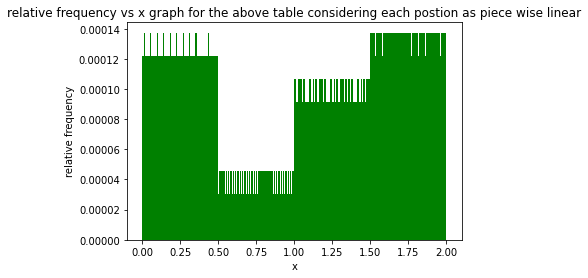

In [5]:

from matplotlib import pyplot as plt
import numpy as np

# To generate random deviates from the group table as data and uniform random variable u
def inveTrans(u, data):
    if u <= data[0][1] : 
        return data[0][0]
    for i in range(1,len(data)):
        if u <= data[i][1]:
            x = data[i][0] + (u - data[i][1])*(data[i][0] - data[i-1][0])/(data[i][1] - data[i-1][1])
            return x
# Generate a list of data using inveTrans wit table in data and list of Uniform random numbers in U
def inveTransList(U, data):
    x = []
    for u in U:
        x.append(inveTrans(u, data))
    return x

# Generate psudo random numbers
def LCM(a, xi, c, m):
    if (m < 0 or a <= 0 or a >= m or xi < 0 or xi >= m):
        return None
    return (a*xi + c)%m
def CalcCycle(a, x0, c,m, limit):
    RndNum = []
    RndNum.append(x0)

    x = LCM(a, x0, c, m)
    lmt = 0
    prime = 0

    while(x not in RndNum and x != None and lmt < limit):
        RndNum.append(x/m)
        x = LCM(a, x, c, m)
        lmt += 1
        #print(x)


    return RndNum

#Initialising and generating pseudo random numbers
limit = 10000000
a = 5
c = 3
m = 2**16
x0 = 1

rndNum = CalcCycle(a, x0, c, m, limit)  

# Data is the table of the form data[i][0] is the max value for
#which the cumilative frequency data[i][1] is valid
data = [[0,0],[.5,.31],[1,.41],[1.5,.66],[2,1]]

x = inveTransList(rndNum, data)
xnp = np.array(x)

#Ploting the table
n,b,p = plt.hist(xnp,weights=np.zeros_like(xnp)+1./ xnp.size, bins= 10000, color='g')

plt.xlabel('x')
plt.ylabel('relative frequency')
plt.title('relative frequency vs x graph for the above table considering each postion as piece wise linear')


plt.show()

